In [1]:
import os
import sys

# Set the project root directory
project_root = os.path.abspath("..")  # Adjust this based on the notebook's location
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
from calibration import WeightedConformalCalibration
import numpy as np
from calibration import load_calibration

weighted_conditional = WeightedConformalCalibration()


Producing conformal plot: data/out/healthsearch_qa_similarity_a=1.00_weighted_removal_fig.png


100%|██████████| 8/8 [40:06<00:00, 300.78s/it]   


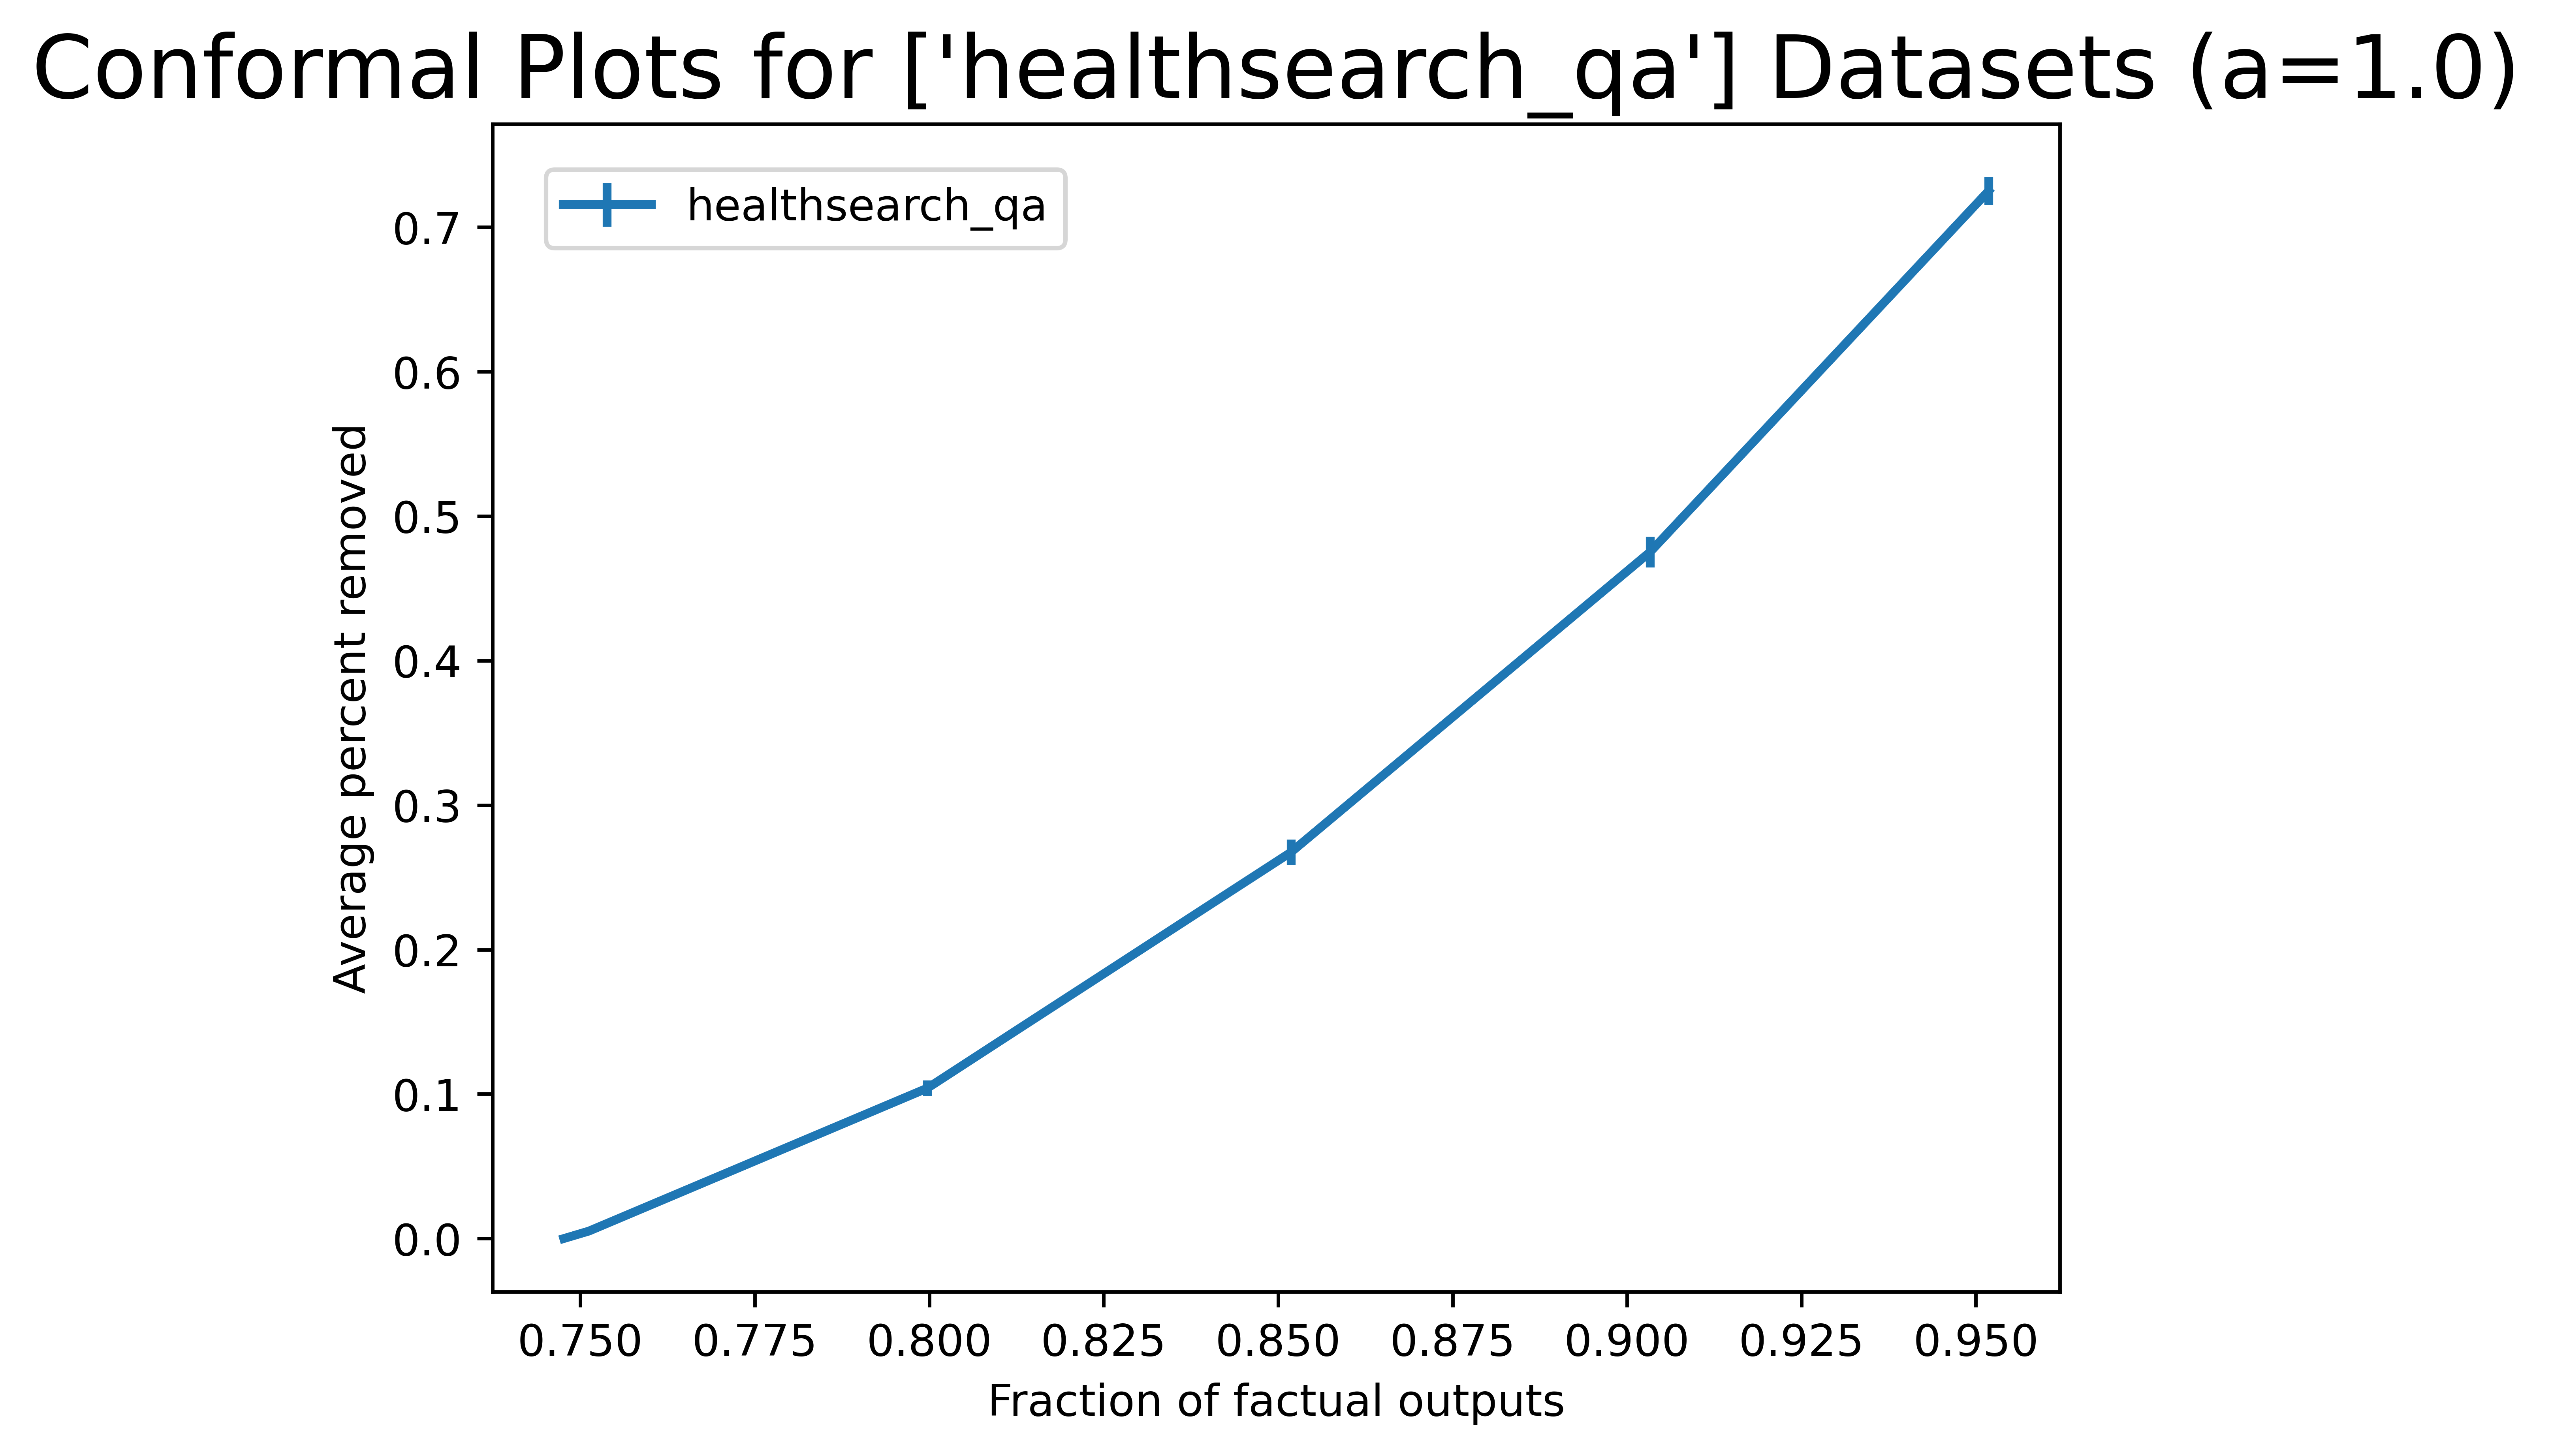

In [8]:

a=1.0
dataset_prefixs = ['healthsearch_qa'] #option: medication_qa, healthsearch_qa, kqa_golden, kqa_silver_wogold, live_qa， medlfqav2
method = 'similarity'
alphas = np.arange(0.05, 0.45, 0.05)
datasets = {}
for dataset_prefix in dataset_prefixs:
    data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
    datasets[dataset_prefix] = data

dsprefixs = "_".join(dataset_prefixs)
fig_filename = f"data/out/{dsprefixs}_{method}_a={a:.2f}_weighted_removal_fig.png"
csv_filename = f"data/out/{dsprefixs}_{method}_a={a:.2f}_weighted_removal.csv"
weighted_conditional.calibrate_removal(
    dataset_prefixs, method, datasets, alphas, a, fig_filename, csv_filename
)

Producing calibration plot: data/out/kqa_golden_similarity_a=1.00_calibration_weighted_conditional_fig.png


100%|██████████| 8/8 [01:55<00:00, 14.46s/it]


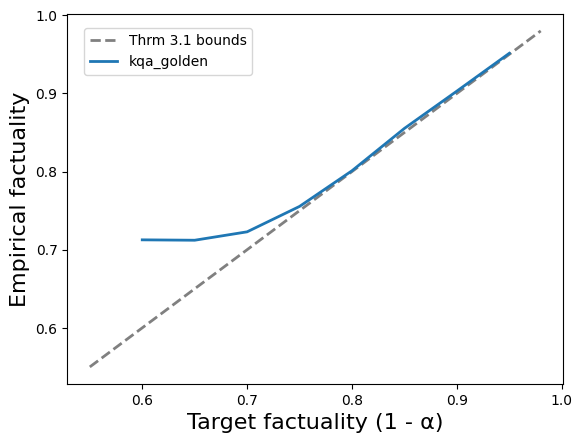

In [7]:

a=1.0
alphas = np.arange(0.05, 0.45, 0.05)
dataset_prefix = 'kqa_golden'
confidence_method = 'similarity'
data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
fig_filename = f"data/out/{dataset_prefix}_{confidence_method}_a={a:.2f}_calibration_weighted_conditional_fig.png"
csv_filename = f"data/out/{dataset_prefix}_{confidence_method}_a={a:.2f}_calibration_weighted_conditional.csv"
weighted_conditional.calibrate_factual(
    dataset_prefix, confidence_method, data, alphas, a, fig_filename, csv_filename
)

# Local conformal VS Group Split Conformal
randomly draw certain amount of data from test data
